In [14]:
# ---------------------------
# 1. Import Libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
# 2. Load Dataset
# ---------------------------
df = pd.read_csv(r"F:\Git\Internship\dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

In [17]:
# ---------------------------
# 3. Data Cleaning
# ---------------------------

# Drop customerID (not useful for modeling)
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric (some empty strings cause issues)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Handle missing values in TotalCharges
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Identify categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("\n✅ After Encoding:")
print(df.head())


✅ After Encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

In [18]:
# ---------------------------
# 4. Train-Test Split
# ---------------------------
X = df.drop("Churn", axis=1)   # Features
y = df["Churn"]                # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
# ---------------------------
# 5. Model Training
# ---------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# ---------------------------
# 6. Predictions
# ---------------------------
y_pred = model.predict(X_test)


In [21]:
# ---------------------------
# 7. Evaluation
# ---------------------------
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.80

Confusion Matrix:
[[912 123]
 [164 210]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1035
           1       0.63      0.56      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



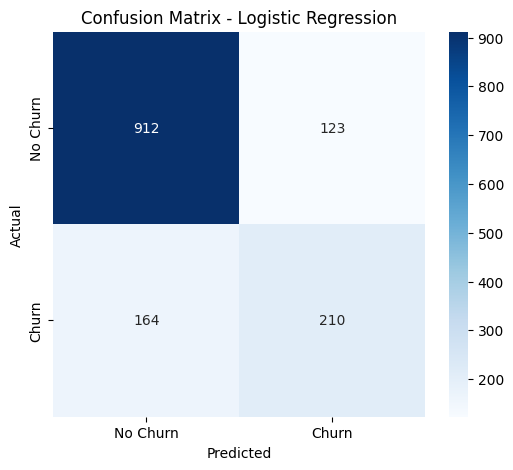

In [22]:
# ---------------------------
# 8. Visualize Confusion Matrix
# ---------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn","Churn"], 
            yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()